<a href="https://colab.research.google.com/github/packetech/baracuda/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0-rc4'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [ ]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive/AIML/Face Recognition')
!pwd

/content/drive/My Drive/AIML/Face Recognition


### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
#### Add your code here ####
project_path = "/content/drive/My Drive/AIML/Face Recognition/" 
from zipfile import ZipFile
with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [ ]:
metadata.shape # just to see the number of images we are dealing with

(10770,)

### Define function to load image
- Define a function to load image from the metadata

In [ ]:
import cv2

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them

    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

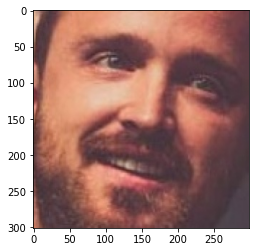

In [ ]:
#### Add your code here ####
from matplotlib import pyplot as plt

img_path = metadata[0].image_path()
img = load_image(img_path)

plt.figure(figsize=(15,4))
plt.imshow(img)


### VGG Face model
- Here we are giving you the predefined model for VGG face

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [ ]:
model = vgg_face()  #### Add your code here ####
#### Add your code here ####
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)
embeddings = embedding_vector
embeddings

(224, 224, 3)
(2622,)


array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097], dtype=float32)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
##### Add your code here ####

import pandas as pd
embeddings = []

metadatalist = metadata.tolist()
# len(metadatalist)
for i in range (len(metadatalist)):
#  img_path = metadata[i].image_path()
#  img = load_image(img_path)
  # Get embedding vector for first image in the metadata using the pre-trained model
  try:
    img_path = metadata[i].image_path()
    img = load_image(img_path)
  except Exception:
    embedding_vector = np.zeros(2622)
  else:
    continue
  finally:
    

  ##### embedding_vector = np.zeros(2622)

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
    #print(img.shape)

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    #print(embedding_vector.shape)
  
  
    embeddings.append(embedding_vector)

#embeddings
#df = pd.DataFrame(embeddings)
#df.count

In [ ]:
#save it a a dataframe to csv file
df_embeddings = pd.DataFrame(embeddings)
df_embeddings.to_csv("/content/drive/My Drive/AIML/Face Recognition/df_embeddings.csv")

# save the np array to csv file
#savetxt('df_embeddings2.csv', embeddings, delimiter=',')

In [ ]:
#import pandas as pd
#pd.set_option('precision', 8) #taking care of the number of decimal points

#df = pd.read_csv('df_embeddings.csv', index_col=0) # reading and dropping the unnecessary index

In [ ]:
#df = df.astype(np.float32) # casting from float64 to float32
#embeddings = df.to_numpy() # converting back to an ndarray
#embeddings

In [ ]:
# Had to save embeddings in a csv (since it took long to generate) 
# Now lets load it back into embeddings
from numpy import genfromtxt
embeddings = genfromtxt('df_embeddings.csv', delimiter=',')
embeddings

array([[            nan,  0.00000000e+00,  1.00000000e+00, ...,
         2.61900000e+03,  2.62000000e+03,  2.62100000e+03],
       [ 0.00000000e+00,  3.17030661e-02, -1.50512978e-02, ...,
         4.31405497e-04,  2.19080690e-03, -9.08097345e-03],
       [ 1.00000000e+00,  3.49770449e-02, -1.05059182e-03, ...,
        -1.05309132e-02,  1.79319957e-03,  2.43915450e-02],
       ...,
       [ 1.07670000e+04,  9.65870731e-03,  3.72158876e-03, ...,
        -1.43340444e-02,  1.89994294e-02,  3.89915444e-02],
       [ 1.07680000e+04,  2.30931211e-03,  9.47639404e-04, ...,
        -1.60049535e-02,  1.05397431e-02,  3.68325301e-02],
       [ 1.07690000e+04,  1.77229904e-02,  1.06404889e-02, ...,
        -2.61842944e-02,  3.28892581e-02,  4.88264784e-02]])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

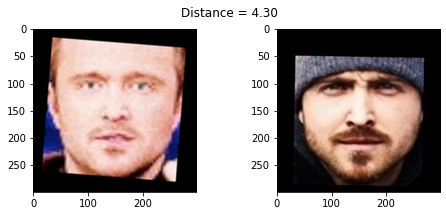

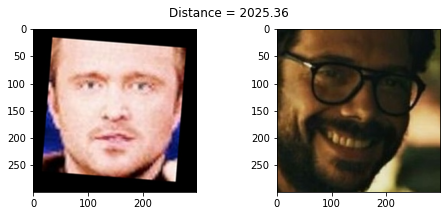

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [ ]:
embeddings = embeddings[1:,1:]

In [ ]:
embeddings

array([[ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
         0.00219081, -0.00908097],
       [ 0.03497704, -0.00105059, -0.01248933, ..., -0.01053091,
         0.0017932 ,  0.02439154],
       [ 0.02801892, -0.00112629, -0.01265749, ..., -0.00904748,
        -0.00578399,  0.02125829],
       ...,
       [ 0.00965871,  0.00372159, -0.01345864, ..., -0.01433404,
         0.01899943,  0.03899154],
       [ 0.00230931,  0.00094764, -0.00544815, ..., -0.01600495,
         0.01053974,  0.03683253],
       [ 0.01772299,  0.01064049,  0.01995195, ..., -0.02618429,
         0.03288926,  0.04882648]])

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0


In [ ]:

#### Add your code here ####

train_idx = embeddings[train_idx]
test_idx = embeddings[test_idx]



In [ ]:
metadata.shape[0]

10770

In [ ]:
test_idx.shape

(1197, 2622)

In [ ]:
train_idx.shape

(9573, 2622)

In [ ]:
train_idx = train_idx[:1197,:]

In [ ]:
#train_idx = train_idx[:1197,:]

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_idx, test_idx, test_size=0.3, random_state=1)

In [ ]:
train_idx = train_idx[:1196,:]

In [ ]:
test_idx = test_idx[:1196,:]

In [ ]:
X_train = train_idx[:598,:]
y_train = train_idx[598:,:]

X_test = test_idx[:598,:]
y_test = test_idx[598:,:]


### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
# prepare target1
encoder = LabelEncoder()
y_train = y_train.reshape(-1,1)
encoder.fit(y_train)
encoder.transform(y_train)
y_train = encoder.transform(y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:


# prepare target2
encoder = LabelEncoder()
y_test = y_test.reshape(-1,1)
encoder.fit(y_test)
y_test = encoder.transform(y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####

# X_train feature
scaler_X_train = StandardScaler().fit(X_train.reshape(-1, 1))
X_train = scaler_X_train.transform(X_train.reshape(-1, 1))

# y_train feature
scaler_y_train = StandardScaler().fit(y_train.reshape(-1, 1))
y_train = scaler_y_train.transform(y_train.reshape(-1, 1))

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

#### Add your code here ####
# Make an instance of the Model
pca = PCA(.95) # 95% of the variance is retained
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train = pca.transform(X_train)
#X_test = pca.transform(X_test.reshape(-1, 1)) # Also do it for X_test, to help the classifier see the same types

In [ ]:
# Doing same for y_train

pca.fit(y_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
y_train = pca.transform(y_train)
#y_test = pca.transform(y_test.reshape(-1, 1)) # Also do it for y_test, to help the classifier see the same types

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [ ]:
#from sklearn.svm import SVC
from sklearn import svm, metrics
#### Add your code here ####
classifier = svm.SVC()
#fit to the trainin data

y = y_train.ravel()
y_train = np.array(y).astype(int)
#model = forest.fit(train_fold, train_y)


classifier.fit(X_train,y_train)


In [ ]:
X_test = X_test.reshape(-1, 1)
y_pred = classifier.predict(X_test)


In [ ]:

# Evaluating model

from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
y_test = y_test.reshape(-1, 1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.externals import joblib
joblib.dump(classifier, ’FaceRecogClassifier.pkl’)

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())


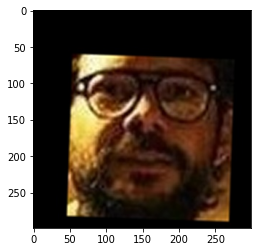

In [ ]:
from matplotlib import pyplot as pyplot

plt.imshow(example_image)

In [ ]:

example_prediction = classifier.predict(X_test[example_idx])  #### Add your code here ####

In [ ]:
#example_image = example_image.reshape(-1, 1)
#example_prediction = classifier.predict(example_image)  #### Add your code here ####

In [ ]:
print("Accuracy:",metrics.accuracy_score(example_image, example_prediction))

Accuracy: 0.4346073682993852


Text(0.5, 1.0, 'Identified as False')

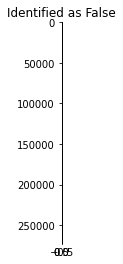

In [ ]:
# The accuracy above is poor, hence it reported false

example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');